Some important notes:
On linear Regression we try to fit a line between data points to satisfy data points. We try to minimize the cost function(sum of squart of errors). We'll find the perfect line by using some formulas:
x^(i) = i'th value of x
y^(i) = i'th value of y
for ex: x represents house square ; y represents house price
m = number of data points
f w,b (x) = wx + b -> Linear Regression Model
J(w,b) = 1/2m * sum(∑)[i=1 to m, (f w,b(x^(i)) - y^(i) )^2] -> Cost function

Gradient descent algorithm: To find the minimum value (can give different answers(local min values) on complex functions)
{Repeat until convergence
    w --> w - α * d^^/d^^(w) * J(w,b) 
                  ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
                  1/m * sum(∑)[i=1 to m, (f w,b(x^(i)) - y^(i))*x^(i)]
    b --> b - α * d^^/d^^(b) * J(w,b)
                  ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
                  1/m * sum(∑)[i=1 to m, f w,b(x^(i)) - y^(i)]
}
Symbol meanings:
    (-->) new value of {left} is {right}    
    (d^^) patrial derivative


On this project we will make a house prediction module with one feature.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Creating a tiny dataset, each row reperesents a data point and first value of each row, represents house spuare(in term of a thousands feet) and secound one represents house price(a thousands $).
tiny_dataset = np.array([[1.0, 211] , [2.1, 420],
                         [1.2, 231] , [2.5, 500],
                         [1.4, 410] , [2.8, 550],
                         [1.6, 380] , [3.0, 530],
                         [1.9, 400] , [3.4, 600]])
print(tiny_dataset)

[[  1.  211. ]
 [  2.1 420. ]
 [  1.2 231. ]
 [  2.5 500. ]
 [  1.4 410. ]
 [  2.8 550. ]
 [  1.6 380. ]
 [  3.  530. ]
 [  1.9 400. ]
 [  3.4 600. ]]


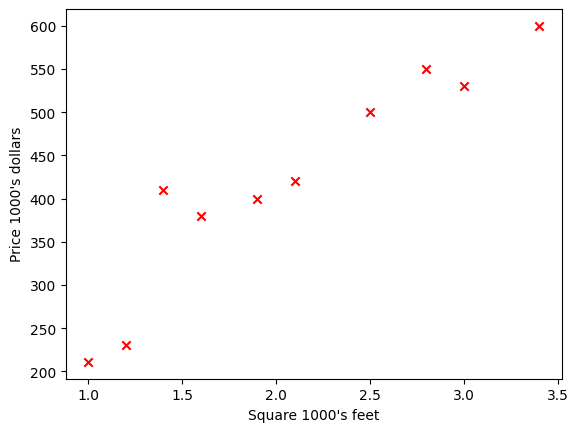

In [57]:
for i in tiny_dataset:
    plt.scatter(i[0],i[1], marker='x', c='r')
#plt.plot([1, 3.5], [200, 700], color='blue', linestyle='-')  #Example line
# We will calculate the best fit line next block
plt.xlabel("Square 1000's feet")
plt.ylabel("Price 1000's dollars")
plt.show()

In [58]:
# Give the first values of w and b (Generally starts from 0)
# We'll use vectors also but now.
# On that code we can clearly determine best fit line, but we also need to determine alpha and t range manually, on next code we will calculate t range
w = 0
b = 0
alpha = 0.1
m = len(tiny_dataset)

for t in range(100):
    tmpw = w
    tmpb = b
    sumw = 0
    sumb = 0
    for i in range(m):
        sumw = (w * tiny_dataset[i][0] - tiny_dataset[i][1]) * tiny_dataset[i][0]   #f(x^(i))
        sumw = sumw / m * alpha
    tmpw -= sumw
    
    for i in range(m):
        sumb = w * tiny_dataset[i][0] - tiny_dataset[i][1]   #f(x^(i))
        sumb = sumb / m * alpha
    tmpb -= sumb

    w = tmpw
    b = tmpb
print(w,b)

176.4697725066288 51.90287426665548


In [59]:
# On that part we will calculate t range, but how. First our target is find the convergence w and b so if they are change really really small on steps,
# We can stop the loop because that means we are really close them.
w = 0
b = 0
alpha = 0.1
m = len(tiny_dataset)
steps = 0
while True:
    tmpw = w
    tmpb = b
    sumw = 0
    sumb = 0
    for i in range(m):
        sumw = (w * tiny_dataset[i][0] - tiny_dataset[i][1]) * tiny_dataset[i][0]   #f(x^(i))
        sumw = sumw / m * alpha
    tmpw -= sumw
    
    for i in range(m):
        sumb = w * tiny_dataset[i][0] - tiny_dataset[i][1]   #f(x^(i))
        sumb = sumb / m * alpha
    tmpb -= sumb

    # Escape condition
    if w / tmpw < 1.0001 and w / tmpw > 0.9999:
        if b / tmpb < 1.0001 and b / tmpb > 0.9999:
            break
    w = tmpw
    b = tmpb
    steps += 1
print("w =",w)
print("b =",b)
print(f"{steps} steps to reach")
# As you can see we can reach really really close values by taking 58 steps, if we need more certain values we can decrease the error intervals

w = 176.32858478393626
b = 51.86134846586358
58 steps to reach


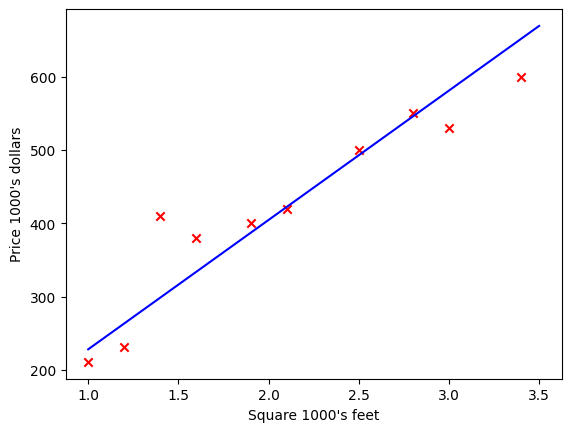

In [60]:
# Finalize program and plotting graph
for i in tiny_dataset:
    plt.scatter(i[0],i[1], marker='x', c='r') # If you keep x and y values seperately and if all x es and y es all together, you can directly write tiny_dataset.. 
plt.plot([1, 3.5], [w*1+b, w*3.5+b], color='blue', linestyle='-')  #Best fit line
plt.xlabel("Square 1000's feet")
plt.ylabel("Price 1000's dollars")
plt.show()